In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("../data/data.csv")
print(df.shape)
df.head()

(5762, 18)


,ID,RAdeg,DEdeg,e_RAdeg,e_DEdeg,RApeak,DEpeak,Sint,e_Sint,Speak,e_Speak,rmspeak,e_rmspeak,thetamaj,thetamin,PA,alpha,e_alpha
0,J022143.11-041344.6,35.42963,-4.22905,2.59,2.65,35.43002,-4.22940,469.39263,0.01424,301.11002,0.00914,0.02774,0.02761,24.06,14.99,136.56,-0.62,0.16
1,J022255.74-051817.5,35.73225,-5.30485,2.29,2.07,35.73219,-5.30480,269.69099,0.01880,232.57525,0.01621,0.02984,0.02973,23.57,21.31,95.65,-0.27,0.03
2,J022632.54-051328.8,36.63557,-5.22467,2.13,1.98,36.63563,-5.22469,71.48008,0.00953,68.15745,0.00909,0.01850,0.01847,20.27,17.55,60.05,-0.65,0.21
3,J022915.86-044216.7,37.31609,-4.70464,3.94,3.38,37.31561,-4.70498,272.04369,0.04092,153.31504,0.02306,0.05453,0.05453,32.70,18.35,53.51,NaN,NaN
4,J021640.74-044404.4,34.16974,-4.73456,2.06,2.08,34.16980,-4.73445,60.58129,0.00945,52.00014,0.00811,0.02091,0.02088,17.02,16.45,34.36,-0.68,0.27


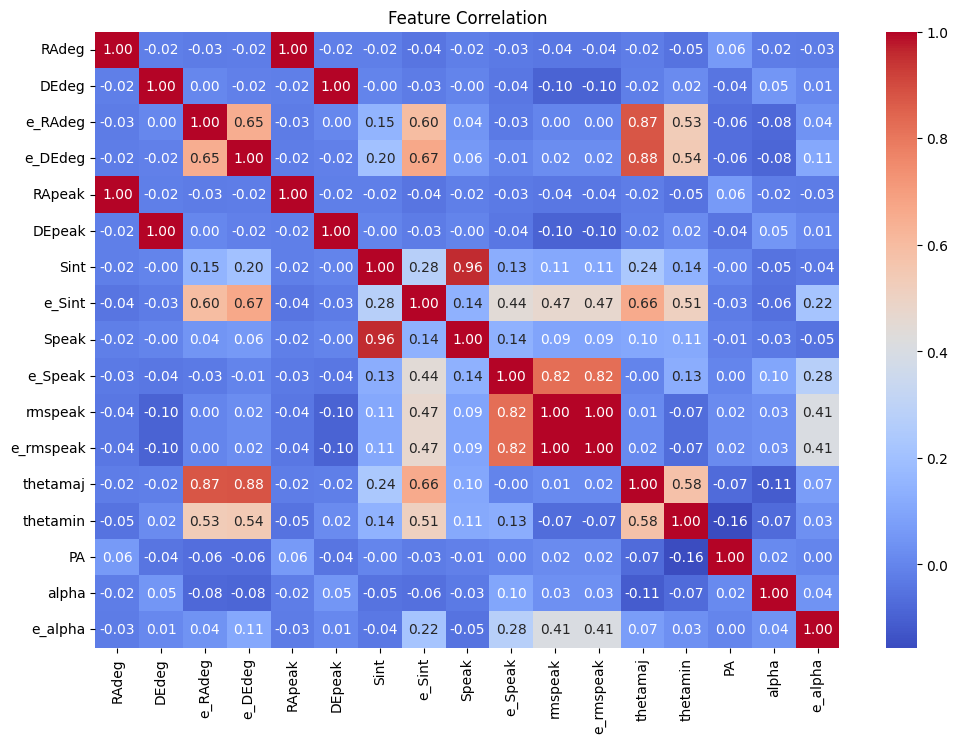

In [6]:
df.dropna(inplace=True)
df = df.drop(columns=["ID"])


plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [7]:
X = df.drop(columns=["alpha"])
Y = df["alpha"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

In [11]:
results_df = pd.DataFrame(results).T.sort_values("R²", ascending=False)
print(results_df)

                        MSE        R²
Random Forest      0.261072  0.023793
Linear Regression  0.262255  0.019371
Ridge Regression   0.265401  0.007606
Lasso Regression   0.267553 -0.000443


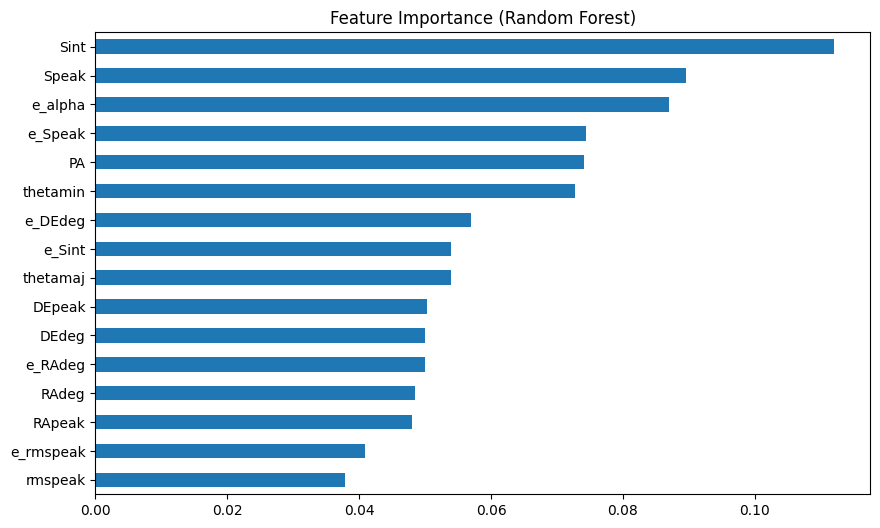

In [12]:
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance (Random Forest)")
plt.show()